<a href="https://colab.research.google.com/github/VISHALOOYADAV/e22cseu1579_lab5/blob/main/E22CSEU1355_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from google.colab import files
files_uploaded=files.upload()

Saving AirQuality.csv to AirQuality.csv


In [ ]:
df=pd.read_csv('AirQuality.csv')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Column1,_1
0,10-03-2004,18.00.00,26,1360,150,119,1046,166,1056,113,1692,1268,136,489,7578,NaN,NaN
1,10-03-2004,19.00.00,2,1292,112,94,955,103,1174,92,1559,972,133,477,7255,NaN,NaN
2,10-03-2004,20.00.00,22,1402,88,90,939,131,1140,114,1555,1074,119,540,7502,NaN,NaN
3,10-03-2004,21.00.00,22,1376,80,92,948,172,1092,122,1584,1203,110,600,7867,NaN,NaN
4,10-03-2004,22.00.00,16,1272,51,65,836,131,1205,116,1490,1110,112,596,7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04-04-2005,10.00.00,31,1314,-200,135,1101,472,539,190,1374,1729,219,293,7568,NaN,NaN
9353,04-04-2005,11.00.00,24,1163,-200,114,1027,353,604,179,1264,1269,243,237,7119,NaN,NaN
9354,04-04-2005,12.00.00,24,1142,-200,124,1063,293,603,175,1241,1092,269,183,6406,NaN,NaN
9355,04-04-2005,13.00.00,21,1003,-200,95,961,235,702,156,1041,770,283,135,5139,NaN,NaN


In [ ]:
xy=df.drop(df.columns[0:13],axis=1)
xy

,RH,AH,Column1,_1
0,489,7578,NaN,NaN
1,477,7255,NaN,NaN
2,540,7502,NaN,NaN
3,600,7867,NaN,NaN
4,596,7888,NaN,NaN
...,...,...,...,...
9352,293,7568,NaN,NaN
9353,237,7119,NaN,NaN
9354,183,6406,NaN,NaN
9355,135,5139,NaN,NaN


In [ ]:
ab=xy.drop(xy.columns[2:4],axis=1)
ab

,RH,AH
0,489,7578
1,477,7255
2,540,7502
3,600,7867
4,596,7888
...,...,...
9352,293,7568
9353,237,7119
9354,183,6406
9355,135,5139


In [ ]:
x=ab[["RH"]]
y=ab[["AH"]]

In [ ]:
x

,RH
0,489
1,477
2,540
3,600
4,596
...,...
9352,293
9353,237
9354,183
9355,135


In [ ]:
y

,AH
0,7578
1,7255
2,7502
3,7867
4,7888
...,...
9352,7568
9353,7119
9354,6406
9355,5139


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
x_train

,RH
4957,664
6933,524
2265,482
624,454
7038,830
...,...
7891,207
9225,674
4859,525
3264,334


In [ ]:
x_test

,RH
1121,317
8028,436
3803,456
4595,467
587,665
...,...
1386,277
5835,605
713,-200
200,693


In [ ]:
y_train

,AH
4957,15145
6933,6767
2265,14476
624,10312
7038,9393
...,...
7891,3221
9225,9722
4859,10130
3264,15900


In [ ]:
y_test

,AH
1121,6821
8028,4129
3803,11558
4595,10899
587,10393
...,...
1386,6864
5835,6788
713,-200
200,10029


In [ ]:
import math
import statistics
import operator

In [ ]:
mean_x=np.mean(x_train)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
mean_x

RH    466.06493
dtype: float64

In [ ]:
mean_y=np.mean(y_train)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
mean_y

AH    9851.802939
dtype: float64

In [ ]:
X=x_train.values

In [ ]:
X

array([[664],
       [524],
       [482],
       ...,
       [525],
       [334],
       [207]])

In [ ]:
Y=y_train.values

In [ ]:
Y

array([[15145],
       [ 6767],
       [14476],
       ...,
       [10130],
       [15900],
       [14036]])

In [ ]:
m=len(X)
m

7485

In [ ]:
mean_x=np.mean(X)

In [ ]:
mean_y=np.mean(Y)

In [ ]:
numer=0
denom=0
for i in range(m):
  numer+=(X[i]-mean_x)*(Y[i]-mean_y)
  denom += (X[i]-mean_x)**2
slope=numer/denom
slope

array([8.2056072])

In [ ]:
intercept=mean_y - (slope*mean_x)
intercept

array([6027.4571956])

In [ ]:
X_test=x_test.values

In [ ]:
X_test

array([[ 317],
       [ 436],
       [ 456],
       ...,
       [-200],
       [ 693],
       [ 255]])

In [ ]:
Y_pred=slope*X_test+intercept

In [ ]:
Y_pred

array([[ 8628.63467765],
       [ 9605.10193432],
       [ 9769.2140783 ],
       ...,
       [ 4386.33575582],
       [11713.94298444],
       [ 8119.88703132]])

In [ ]:
x_test["Predicted RH"]=Y_pred
x_test

,RH,Predicted RH
1121,317,8628.634678
8028,436,9605.101934
3803,456,9769.214078
4595,467,9859.475757
587,665,11484.185983
...,...,...
1386,277,8300.410390
5835,605,10991.849551
713,-200,4386.335756
200,693,11713.942984


In [ ]:
x_test["Actual price"]=y_test
x_test

,RH,Predicted RH,Actual price
1121,317,8628.634678,6821
8028,436,9605.101934,4129
3803,456,9769.214078,11558
4595,467,9859.475757,10899
587,665,11484.185983,10393
...,...,...,...
1386,277,8300.410390,6864
5835,605,10991.849551,6788
713,-200,4386.335756,-200
200,693,11713.942984,10029


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,Y_pred)
print('The accuracy of our model is {}%',format(round(score,2)*100))

The accuracy of our model is {}% 16.0


Text(0.5, 0, 'area')

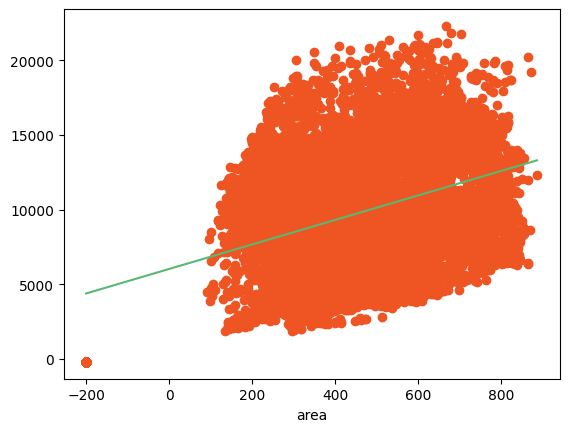

In [ ]:
max_x = np.max(X)
min_x = np.min(X)
x = np.linspace(min_x, max_x)
y = intercept + slope * x
plt.plot(x,y,color='#58b970',label='Regression Line')
plt.scatter(X,Y,c='#ef5423',label='Data Points')
plt.xlabel('area')